# Test new features with multiclass classification
## Kaggle Otto Group
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

%matplotlib inline

In [2]:
# read training set
otto_raw = pd.read_csv('otto_train.csv')

otto_raw['target'] = otto_raw['target'].apply(lambda x : int(x.split('_')[1])-1)
otto_train = otto_raw.drop(['id', 'target'], axis=1)

# build simple xgboost model
clf = xgb.XGBClassifier(objective='multi:softprob', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100, nthread=4)
%time clf.fit(otto_train, otto_raw['target'])

target_dummies = pd.get_dummies(otto_raw['target'], prefix='target')
otto_raw = pd.concat([otto_raw, target_dummies], axis=1)

CPU times: user 2min 38s, sys: 1.62 s, total: 2min 40s
Wall time: 44.8 s


# testing PDPbox new features

In [3]:
import sys
sys.path.insert(0, '../../pdpbox/')

import pdp as pdp_test
from pdpbox import pdp

## test joblib and pickle

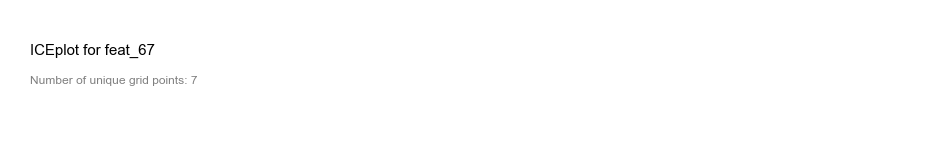

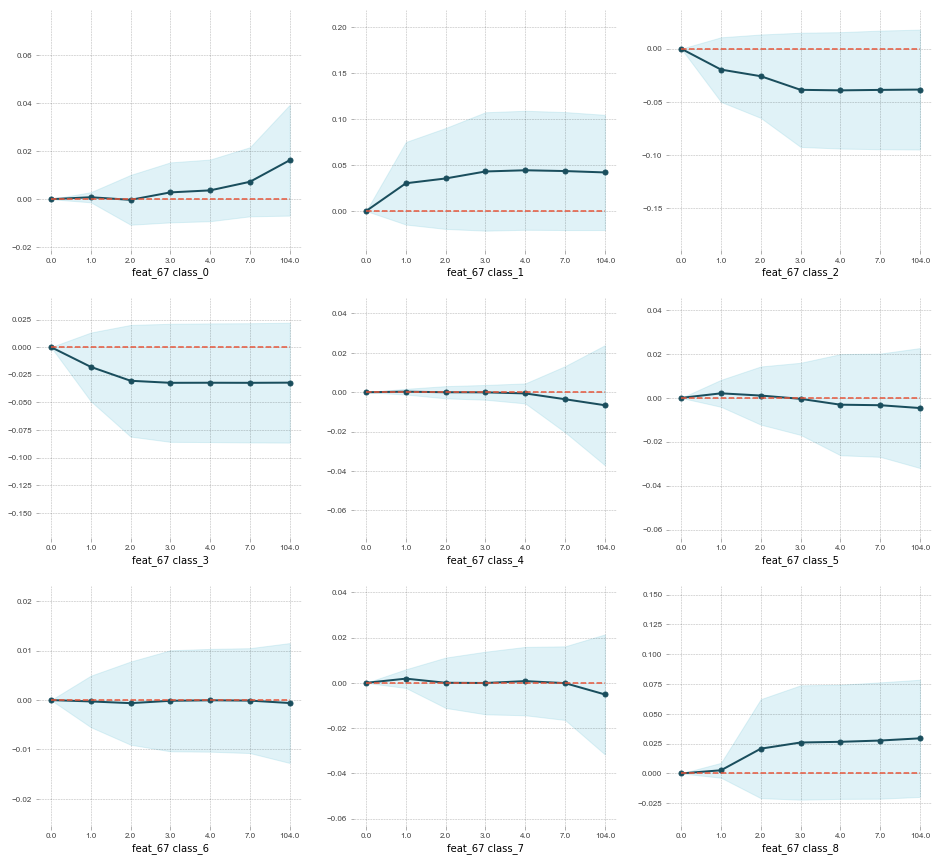

In [4]:
pdp_feat_67 = pdp_test.pdp_isolate(clf, otto_train, 'feat_67')
pdp_test.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3)

In [5]:
from sklearn.externals import joblib

joblib.dump(pdp_feat_67, 'pdp_feat_67.pkl', compress=True)
pdp_feat_67 = joblib.load('pdp_feat_67.pkl')

In [6]:
import pickle

pickle.dump(pdp_feat_67, open("pdp_feat_67.pickle", "wb"))
pdp_feat_67 = pickle.load(open("pdp_feat_67.pickle", "r"))

## test parallel processing

In [7]:
%time pdp_feat_67 = pdp_test.pdp_isolate(clf, otto_train, 'feat_67')

CPU times: user 21.8 s, sys: 968 ms, total: 22.8 s
Wall time: 23 s


In [8]:
%time pdp_feat_67 = pdp_test.pdp_isolate(clf, otto_train, 'feat_67', n_jobs=4)

CPU times: user 3.45 s, sys: 578 ms, total: 4.03 s
Wall time: 11.5 s


#### compare with the original one

In [9]:
%time pdp_feat_67_old = pdp.pdp_isolate(clf, otto_train, 'feat_67')

CPU times: user 21.9 s, sys: 1.15 s, total: 23.1 s
Wall time: 23.2 s


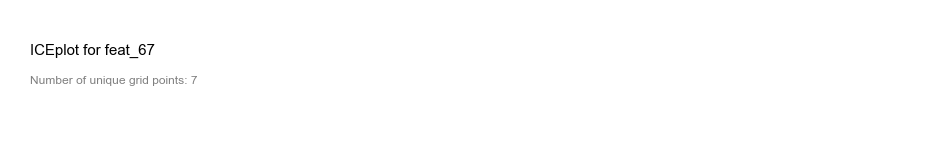

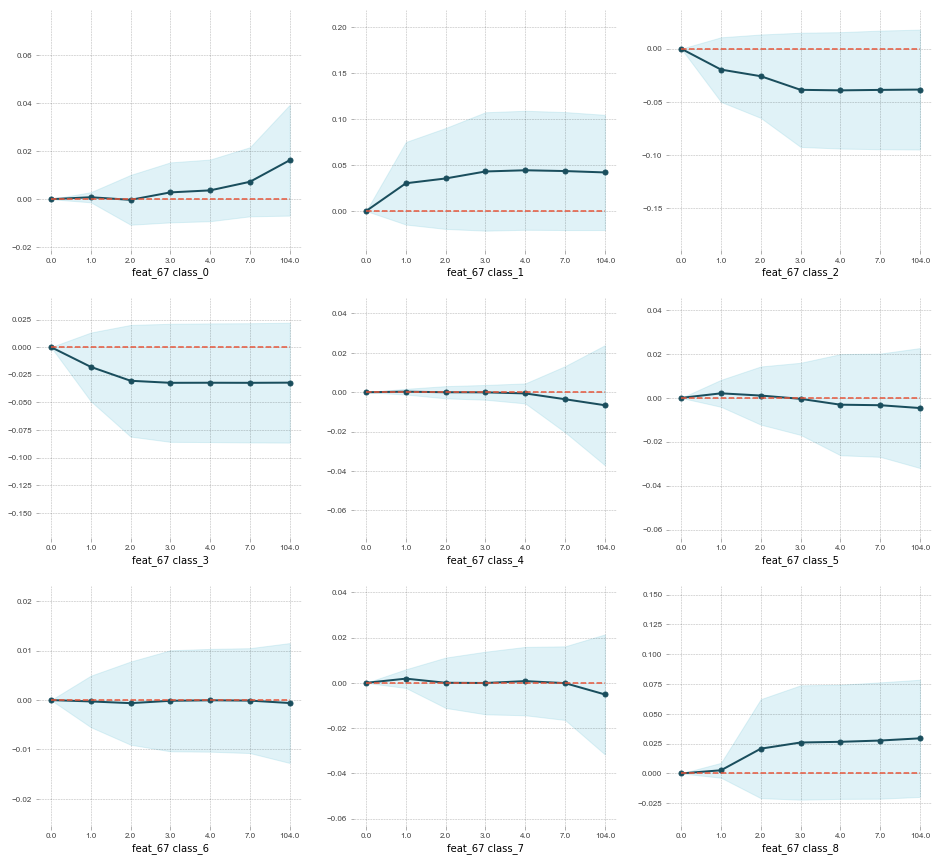

In [10]:
pdp.pdp_plot(pdp_feat_67_old, 'feat_67', center=True, x_quantile=True, ncols=3)

## test parallel processing: interation plot

In [11]:
%time pdp_67_24 = pdp_test.pdp_interact(clf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10], n_jobs=4)

CPU times: user 7.05 s, sys: 1.53 s, total: 8.58 s
Wall time: 52.9 s


In [12]:
%time pdp_67_24 = pdp_test.pdp_interact(clf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10])

CPU times: user 2min 25s, sys: 7.3 s, total: 2min 32s
Wall time: 2min 33s


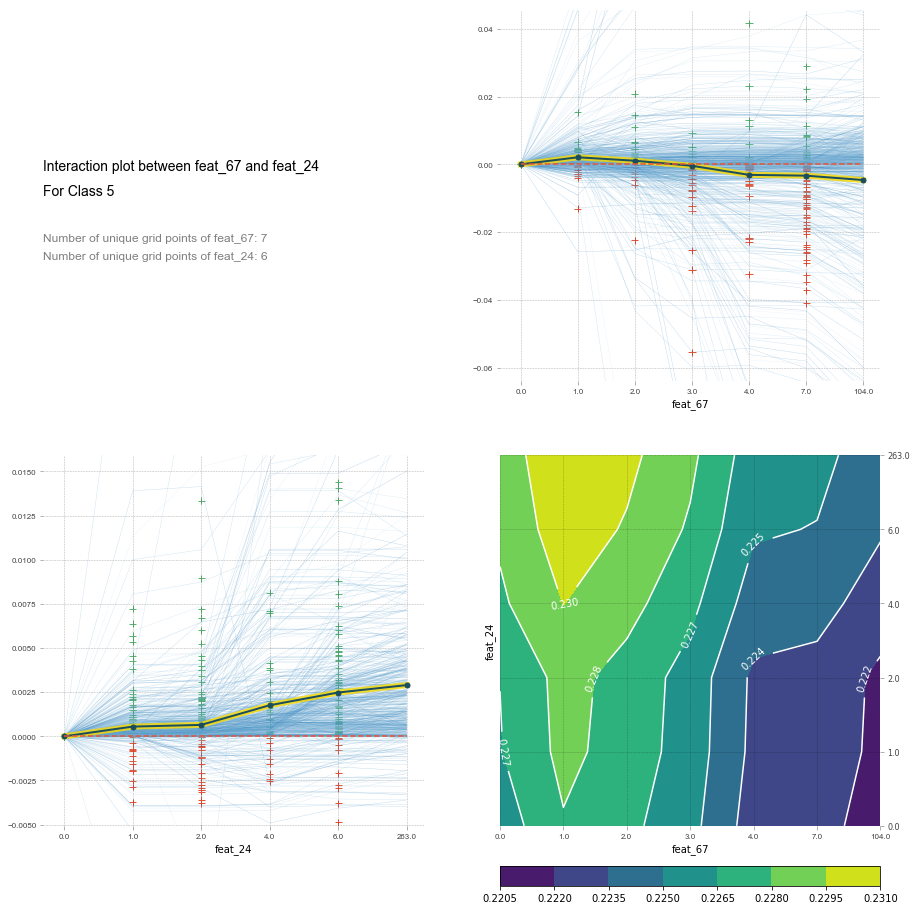

In [13]:
pdp_test.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                           frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)

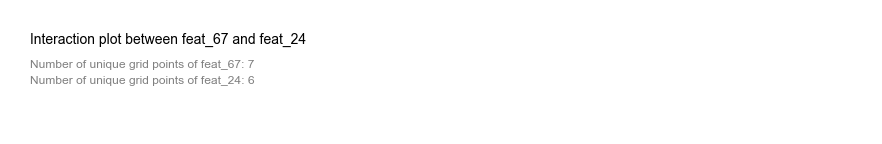

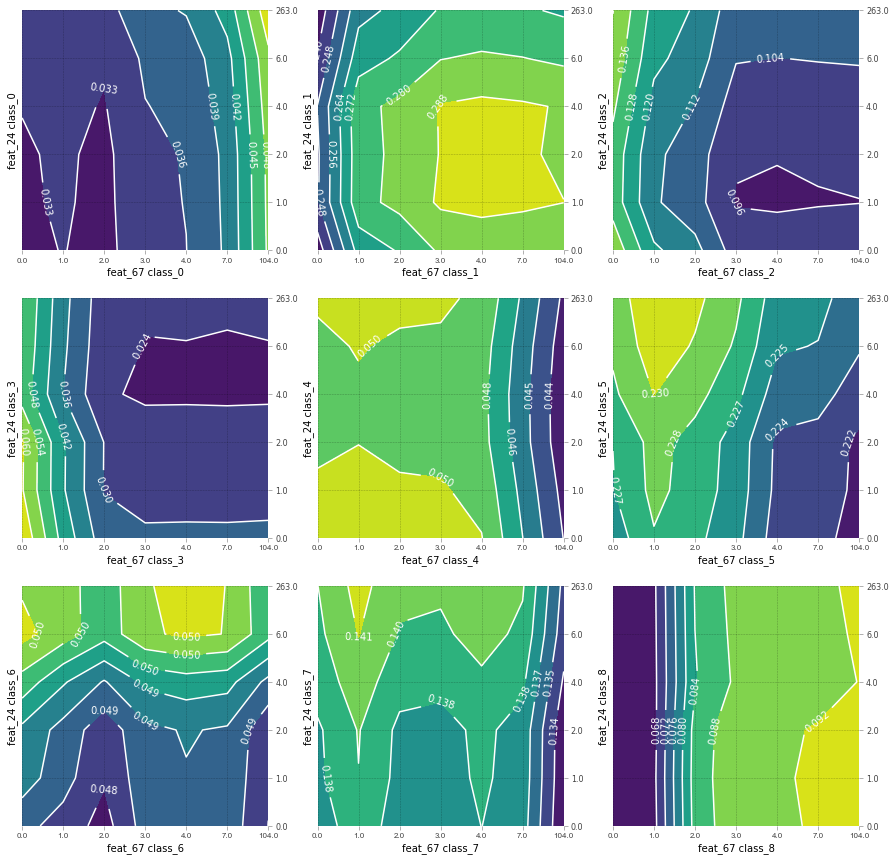

In [14]:
pdp_test.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                           frac_to_plot=0.01, multi_flag=False, x_quantile=True, only_inter=True, ncols=3)

#### compare with the original one

In [15]:
%time pdp_67_24_old = pdp.pdp_interact(clf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10])

CPU times: user 2min 21s, sys: 9.53 s, total: 2min 31s
Wall time: 2min 31s


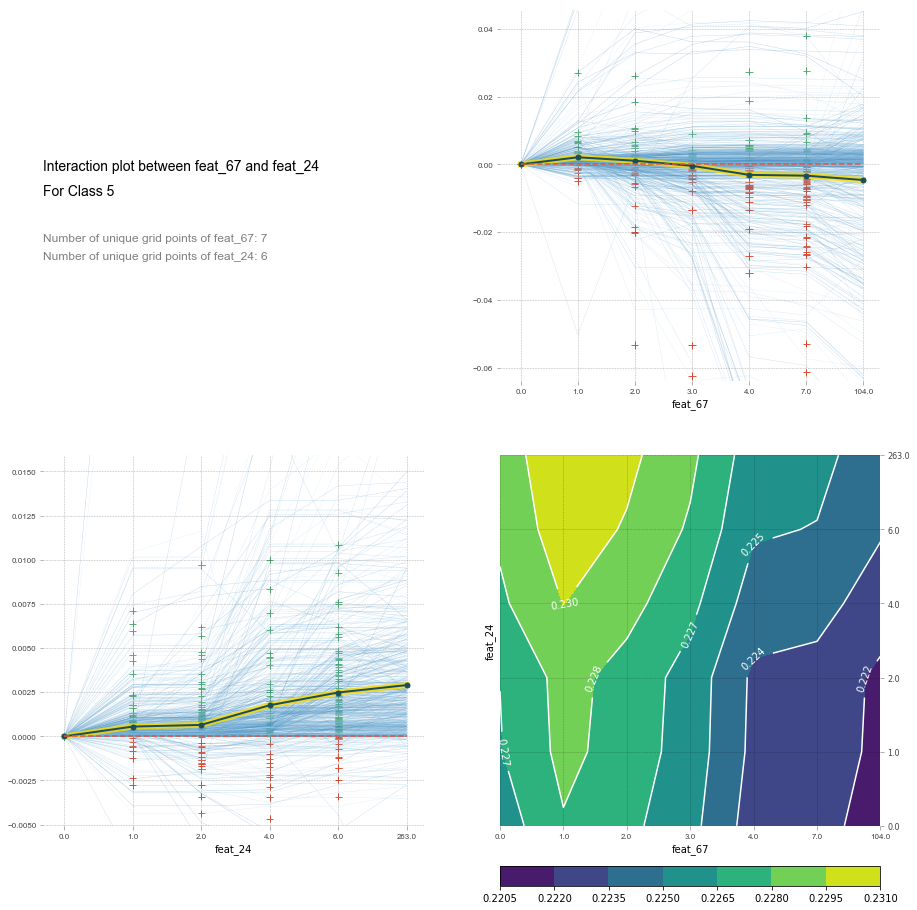

In [16]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)

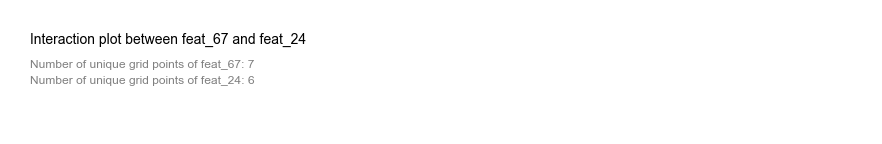

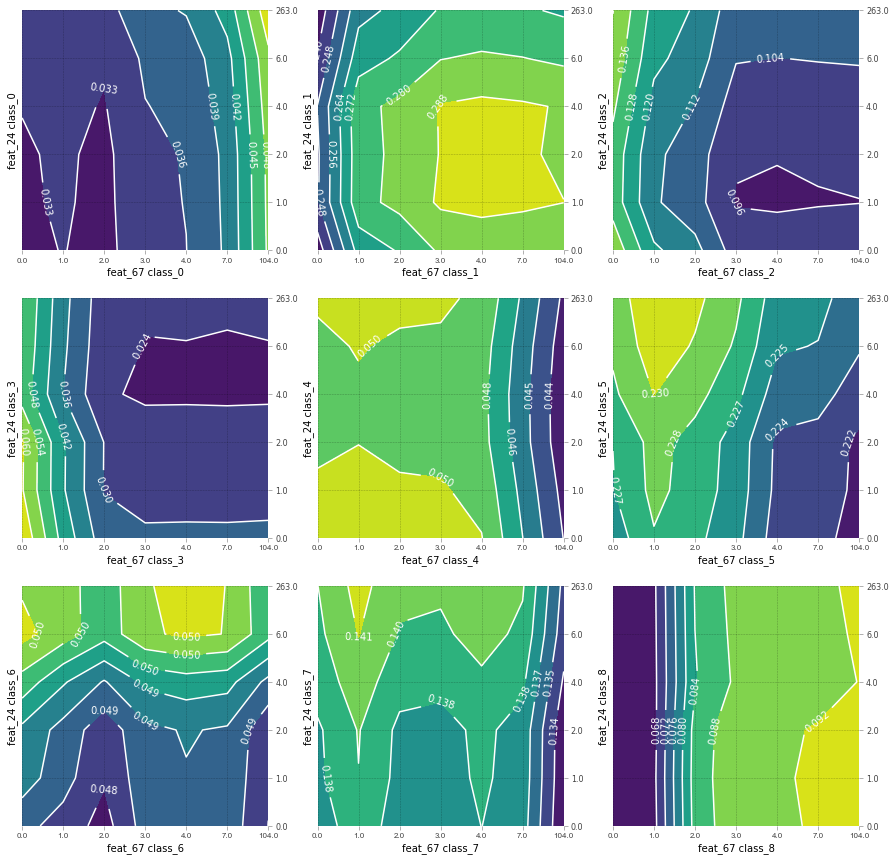

In [17]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=False, x_quantile=True, only_inter=True, ncols=3)